In [51]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [52]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [53]:
len(X_train)

60000

In [54]:
len(X_test)

10000

In [55]:
X_train[0].shape

(28, 28)

In [56]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

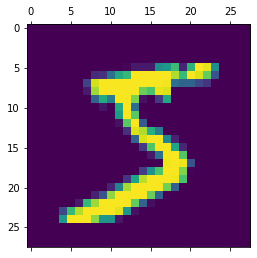

In [57]:
plt.matshow(X_train[0])

In [58]:
y_train[0]

5

In [59]:
X_train.shape

(60000, 28, 28)

In [60]:
#scaling our data > gives higher accuracy
X_train = X_train / 255
X_test = X_test / 255

In [61]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [62]:
X_train_flattened = X_train.reshape(len(X_train), 28*28) #flattened the training set into single dimensional array
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape

(60000, 784)

# Neural network with 784 i/p elements and 10 o/p elements

In [63]:
#Sequential > stack of layers, here only two - i/p and o/p
#Dense > every element is connected to every element of the next layer
# 10 o/p elements, 784x0 input, sigmoid activation function
model = keras.Sequential([                                                 
    keras.layers.Dense(10, input_shape = (784,), activation="sigmoid")
])

#optimizer > for better training
#loss > 
model.compile( 
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

#epoch is number of iterations
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7191 - accuracy: 0.8131
Epoch 2/5
1875/1875 [==============================] - 2s 904us/step - loss: 0.3139 - accuracy: 0.9137
Epoch 3/5
1875/1875 [==============================] - 1s 775us/step - loss: 0.2842 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 2s 812us/step - loss: 0.2746 - accuracy: 0.9231
Epoch 5/5
1875/1875 [==============================] - 2s 804us/step - loss: 0.2634 - accuracy: 0.9263


In [64]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 646us/step - loss: 0.2707 - accuracy: 0.9245


[0.27071261405944824, 0.9244999885559082]

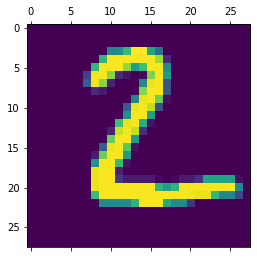

In [65]:
plt.matshow(X_test[1])

In [66]:
#prediction for each number
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

array([3.5992506e-01, 4.5090616e-03, 9.9930322e-01, 1.9529444e-01,
       4.2421530e-10, 8.8884807e-01, 8.9970756e-01, 8.2212709e-13,
       2.1589062e-01, 2.3934257e-09], dtype=float32)

In [67]:
np.argmax(y_predicted[1])

2

In [68]:
#finding np.argmax label for each prediction
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [69]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [70]:
#building confusion matrix
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    2,    1,    0,    5,    9,    4,    2,    1],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   3,    9,  923,   12,    6,    5,   13,   11,   47,    3],
       [   3,    0,   23,  895,    0,   39,    3,   15,   27,    5],
       [   1,    1,    6,    0,  905,    0,   16,    5,   10,   38],
       [   7,    2,    5,   14,    9,  791,   18,    8,   30,    8],
       [   7,    3,    5,    1,    6,   10,  922,    2,    2,    0],
       [   1,    6,   26,    4,    5,    0,    0,  954,    3,   29],
       [   6,    6,    6,   16,    8,   26,   11,   13,  877,    5],
       [   9,    7,    1,    9,   25,    7,    1,   31,    7,  912]])>

Text(0.5, 42.0, 'Truth')

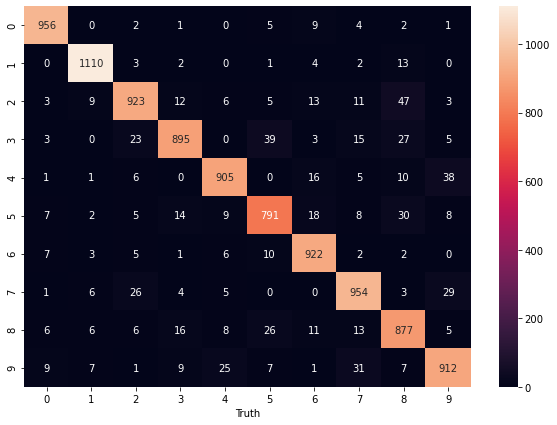

In [71]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.xlabel('Truth')

In [72]:
#adding hidden layer to improve performance, can add more
model = keras.Sequential([                                                 
    keras.layers.Dense(100, input_shape = (784,), activation="relu"),    #layer1. o/p no. is by trial and error. 100 neurons
    keras.layers.Dense(10, activation="sigmoid")                         #layer2, no need to specify i/p. 10 neurons
])

#optimizer > for better training
#loss > 
model.compile( 
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

#epoch is number of iterations
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4509 - accuracy: 0.8752
Epoch 2/5
1875/1875 [==============================] - 2s 993us/step - loss: 0.1382 - accuracy: 0.9607
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0881 - accuracy: 0.9725
Epoch 4/5
1875/1875 [==============================] - 2s 973us/step - loss: 0.0641 - accuracy: 0.9815
Epoch 5/5
1875/1875 [==============================] - 2s 964us/step - loss: 0.0514 - accuracy: 0.9852


In [73]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 885us/step - loss: 0.0840 - accuracy: 0.9745


[0.08403199166059494, 0.9745000004768372]

Text(0.5, 42.0, 'Truth')

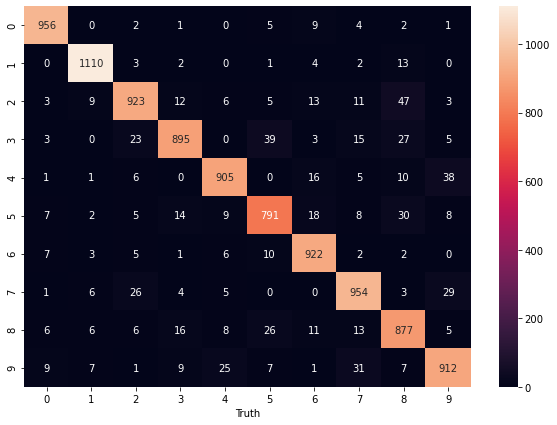

In [74]:
## accuracy went from 92 to 97
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.xlabel('Truth')

# Using flatten layer so that we dont have to call .reshape

In [75]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation="relu"),                         #layer1. o/p is by trial and error. 100 neurons
    keras.layers.Dense(10, activation="sigmoid")                        #layer2, no need to specify i/p. 10 neurons
])

#optimizer > for better training
#loss > 
model.compile( 
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

#epoch is number of iterations
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4568 - accuracy: 0.8726
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1241 - accuracy: 0.9630
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0826 - accuracy: 0.9762
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0604 - accuracy: 0.9813
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0489 - accuracy: 0.9860


# Adding Tensorboard

In [76]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation="relu"),                         #layer1. o/p is by trial and error. 100 neurons
    keras.layers.Dense(10, activation="sigmoid")                        #layer2, no need to specify i/p. 10 neurons
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)  #all events will be stored in logs directory where notbook is stored

#optimizer > for better training
#loss > method to calculate loss due to error
model.compile( 
    optimizer = 'SGD',                                                  #Stochastic Gradient Descent
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

#epoch is number of iterations
model.fit(X_train, y_train, epochs=5, callbacks = [tb_callback])        #as epoch is run, all loss, accuracy info will be supplied to tb_callback

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0325 - accuracy: 0.7304
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3649 - accuracy: 0.8979
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3057 - accuracy: 0.9134
Epoch 4/5
1875/1875 [==============================] - 2s 947us/step - loss: 0.2742 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2513 - accuracy: 0.9288


In [77]:
#To view on chrome:
#Run tensorboard --logdir=YOUR_LOG_DIR(logs/ here) --host=127.0.0.1 in command prompt, and type localhost:6006 in chrome OR

%load_ext tensorboard
%tensorboard --logdir logs/fit

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 22332.